In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro


In [26]:


np.random.seed(42)

n = 300

dados = pd.DataFrame({
    'Sexo': np.random.choice(['Masculino', 'Feminino'], size=n),
    'Idade': np.random.randint(16, 22, size=n),
    'UF': np.random.choice(['SP', 'RJ', 'MG', 'BA', 'RS'], size=n),
    'Escola': np.random.choice(['Pública', 'Privada'], size=n, p=[0.7, 0.3]),
    'Nota_Redacao': np.random.normal(loc=600, scale=80, size=n).clip(0, 1000),
    'Nota_Matematica': np.random.normal(loc=580, scale=90, size=n).clip(0, 1000),
    'Nota_Linguagens': np.random.normal(loc=550, scale=85, size=n).clip(0, 1000),
    'Nota_Ciencias_Humanas': np.random.normal(loc=530, scale=75, size=n).clip(0, 1000),
    'Nota_Ciencias_Natureza': np.random.normal(loc=540, scale=78, size=n).clip(0, 1000)
})

dados['Media_Geral'] = dados[['Nota_Redacao', 'Nota_Matematica', 'Nota_Linguagens',
                              'Nota_Ciencias_Humanas', 'Nota_Ciencias_Natureza']].mean(axis=1)

dados.to_csv("dados_enem_simulados.csv", index=False)
dados.head()



,Sexo,Idade,UF,Escola,Nota_Redacao,Nota_Matematica,Nota_Linguagens,Nota_Ciencias_Humanas,Nota_Ciencias_Natureza,Media_Geral
0,Masculino,16,MG,Pública,579.454638,636.890449,446.273023,553.029839,453.049679,533.739525
1,Feminino,16,BA,Privada,681.942927,491.911002,488.912036,520.144782,547.618717,546.105893
2,Masculino,18,BA,Privada,470.198110,611.670196,661.356213,468.266145,531.085539,548.515241
3,Masculino,21,RJ,Pública,627.279068,591.950263,553.328932,517.686544,527.730801,563.595122
4,Masculino,17,MG,Pública,602.045707,733.152659,566.433107,565.249870,528.414851,599.059239


In [27]:
# colunas de nota
colunas_notas = ['Nota_Redacao', 'Nota_Matematica', 'Nota_Linguagens',
                 'Nota_Ciencias_Humanas', 'Nota_Ciencias_Natureza']

#  média, mediana e moda
tendencia_central = pd.DataFrame({
    'Média': dados[colunas_notas].mean(),
    'Mediana': dados[colunas_notas].median(),
    'Moda': dados[colunas_notas].mode().iloc[0]
})


print(tendencia_central.round(2))

tendencia_central.round(2).style\
    .set_caption("📊 Medidas de Tendência Central por Área")\
    .background_gradient(cmap='Blues')\
    .format("{:.2f}")



                         Média  Mediana    Moda
Nota_Redacao            610.05   604.32  377.28
Nota_Matematica         589.14   588.15  345.11
Nota_Linguagens         549.76   553.41  265.11
Nota_Ciencias_Humanas   529.75   529.15  332.64
Nota_Ciencias_Natureza  545.92   550.89  335.34


,Média,Mediana,Moda
Nota_Redacao,610.05,604.32,377.28
Nota_Matematica,589.14,588.15,345.11
Nota_Linguagens,549.76,553.41,265.11
Nota_Ciencias_Humanas,529.75,529.15,332.64
Nota_Ciencias_Natureza,545.92,550.89,335.34


In [28]:
colunas_notas = ['Nota_Redacao', 'Nota_Matematica', 'Nota_Linguagens',
                 'Nota_Ciencias_Humanas', 'Nota_Ciencias_Natureza']

dispersao = pd.DataFrame({
    'Amplitude': dados[colunas_notas].max() - dados[colunas_notas].min(),
    'Desvio Padrão': dados[colunas_notas].std(),
    'Variância': dados[colunas_notas].var()
})

print(dispersao.round(2))

dispersao.round(2).style\
    .set_caption("📊 Medidas de Dispersão das Notas do ENEM")\
    .background_gradient(cmap="Purples")\
    .format("{:.2f}")



                        Amplitude  Desvio Padrão  Variância
Nota_Redacao               476.11          84.28    7103.70
Nota_Matematica            514.32          96.22    9259.09
Nota_Linguagens            514.36          82.66    6833.21
Nota_Ciencias_Humanas      388.37          71.25    5076.89
Nota_Ciencias_Natureza     413.19          74.90    5609.52


,Amplitude,Desvio Padrão,Variância
Nota_Redacao,476.11,84.28,7103.70
Nota_Matematica,514.32,96.22,9259.09
Nota_Linguagens,514.36,82.66,6833.21
Nota_Ciencias_Humanas,388.37,71.25,5076.89
Nota_Ciencias_Natureza,413.19,74.90,5609.52


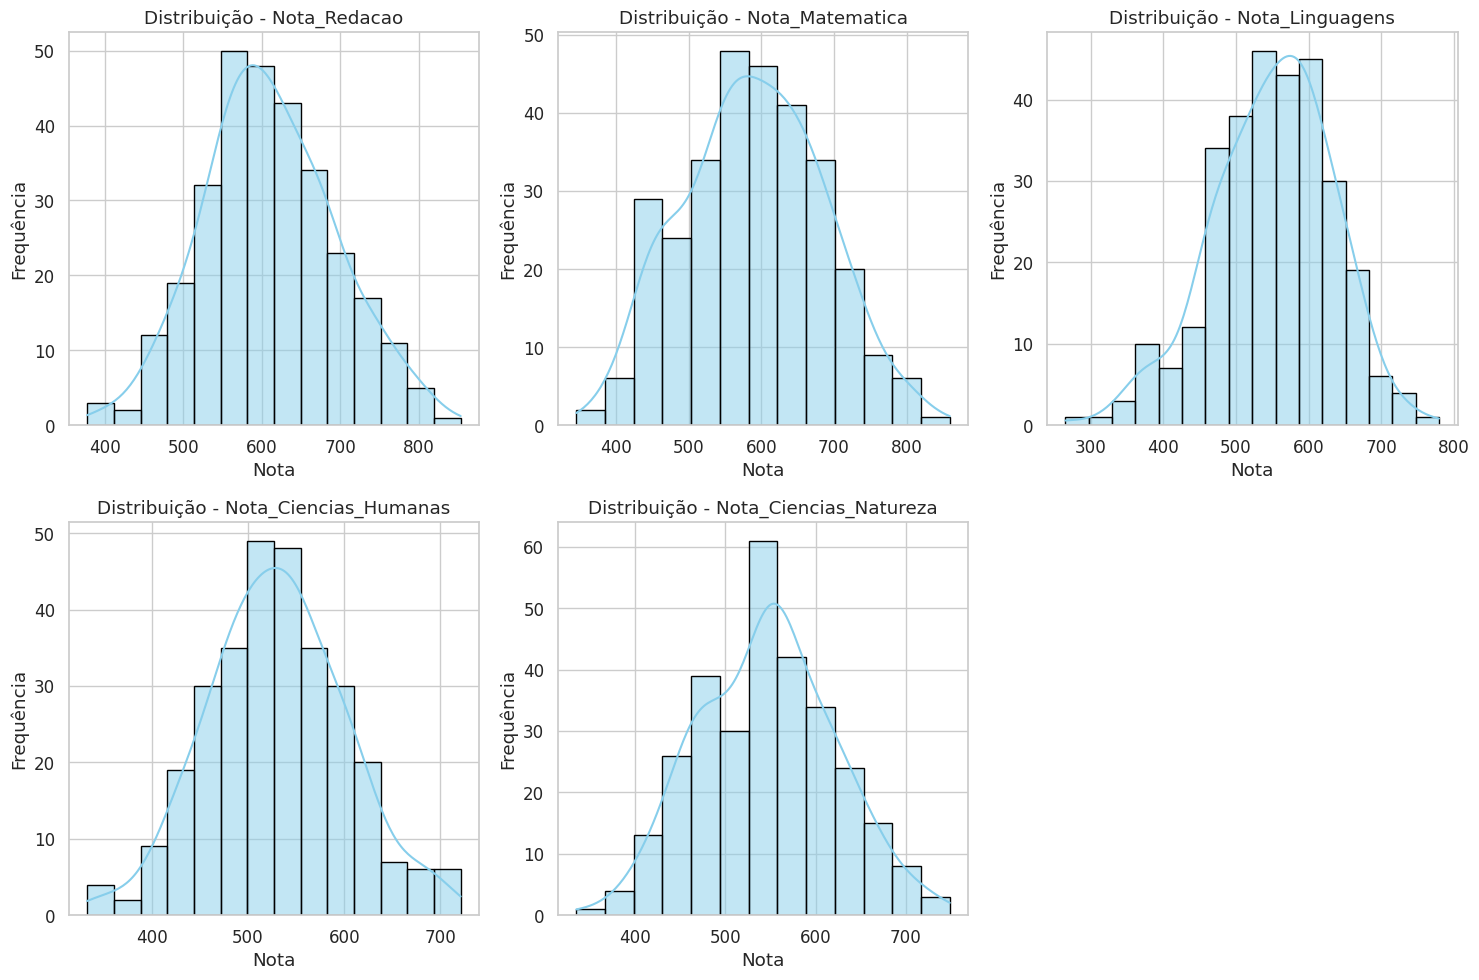


Resumo do Teste de Normalidade (Shapiro-Wilk):

               Disciplina  Estatística  p-valor              Decisão
0            Nota_Redacao       0.9958   0.6034  Distribuição NORMAL
1         Nota_Matematica       0.9939   0.2630  Distribuição NORMAL
2         Nota_Linguagens       0.9908   0.0578  Distribuição NORMAL
3   Nota_Ciencias_Humanas       0.9969   0.8408  Distribuição NORMAL
4  Nota_Ciencias_Natureza       0.9961   0.6786  Distribuição NORMAL


,Disciplina,Estatística,p-valor,Decisão
0,Nota_Redacao,0.9958,0.6034,Distribuição NORMAL
1,Nota_Matematica,0.9939,0.2630,Distribuição NORMAL
2,Nota_Linguagens,0.9908,0.0578,Distribuição NORMAL
3,Nota_Ciencias_Humanas,0.9969,0.8408,Distribuição NORMAL
4,Nota_Ciencias_Natureza,0.9961,0.6786,Distribuição NORMAL


In [29]:


# Colunas com as notas
colunas_notas = ['Nota_Redacao', 'Nota_Matematica', 'Nota_Linguagens',
                 'Nota_Ciencias_Humanas', 'Nota_Ciencias_Natureza']

# Lista para armazenar os resultados
resultados_normalidade = []

plt.figure(figsize=(15, 10))

for i, coluna in enumerate(colunas_notas, 1):
    # teste Shapiro-Wilk
    stat, p = shapiro(dados[coluna])

    # Define a decisão com base no p
    if p > 0.05:
        decisao = "Distribuição NORMAL"
    else:
        decisao = "Distribuição NÃO NORMAL"

    # Armazena os resultados
    resultados_normalidade.append({
        'Disciplina': coluna,
        'Estatística': round(stat, 4),
        'p-valor': round(p, 4),
        'Decisão': decisao
    })

    # Visualização
    plt.subplot(2, 3, i)
    sns.histplot(dados[coluna], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição - {coluna}')
    plt.xlabel('Nota')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Criar DataFrame com os resultados do teste
df_normalidade = pd.DataFrame(resultados_normalidade)

# resumo dos testes
print("\nResumo do Teste de Normalidade (Shapiro-Wilk):\n")
print(df_normalidade)

def color_decision(val):
    if val == "Distribuição NORMAL":
        color = 'background-color: #c6efce; color: #006100'
    else:
        color = 'background-color: #ffc7ce; color: #9c0006'
    return color

#tabela bonita
styled_table = df_normalidade.style\
    .set_caption("📋 Resultado do Teste de Normalidade - Shapiro-Wilk")\
    .format({"Estatística": "{:.4f}", "p-valor": "{:.4f}"})\
    .map(color_decision, subset=['Decisão'])\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'center'), ('background-color', '#404040'), ('color', 'white')]
    }])

styled_table


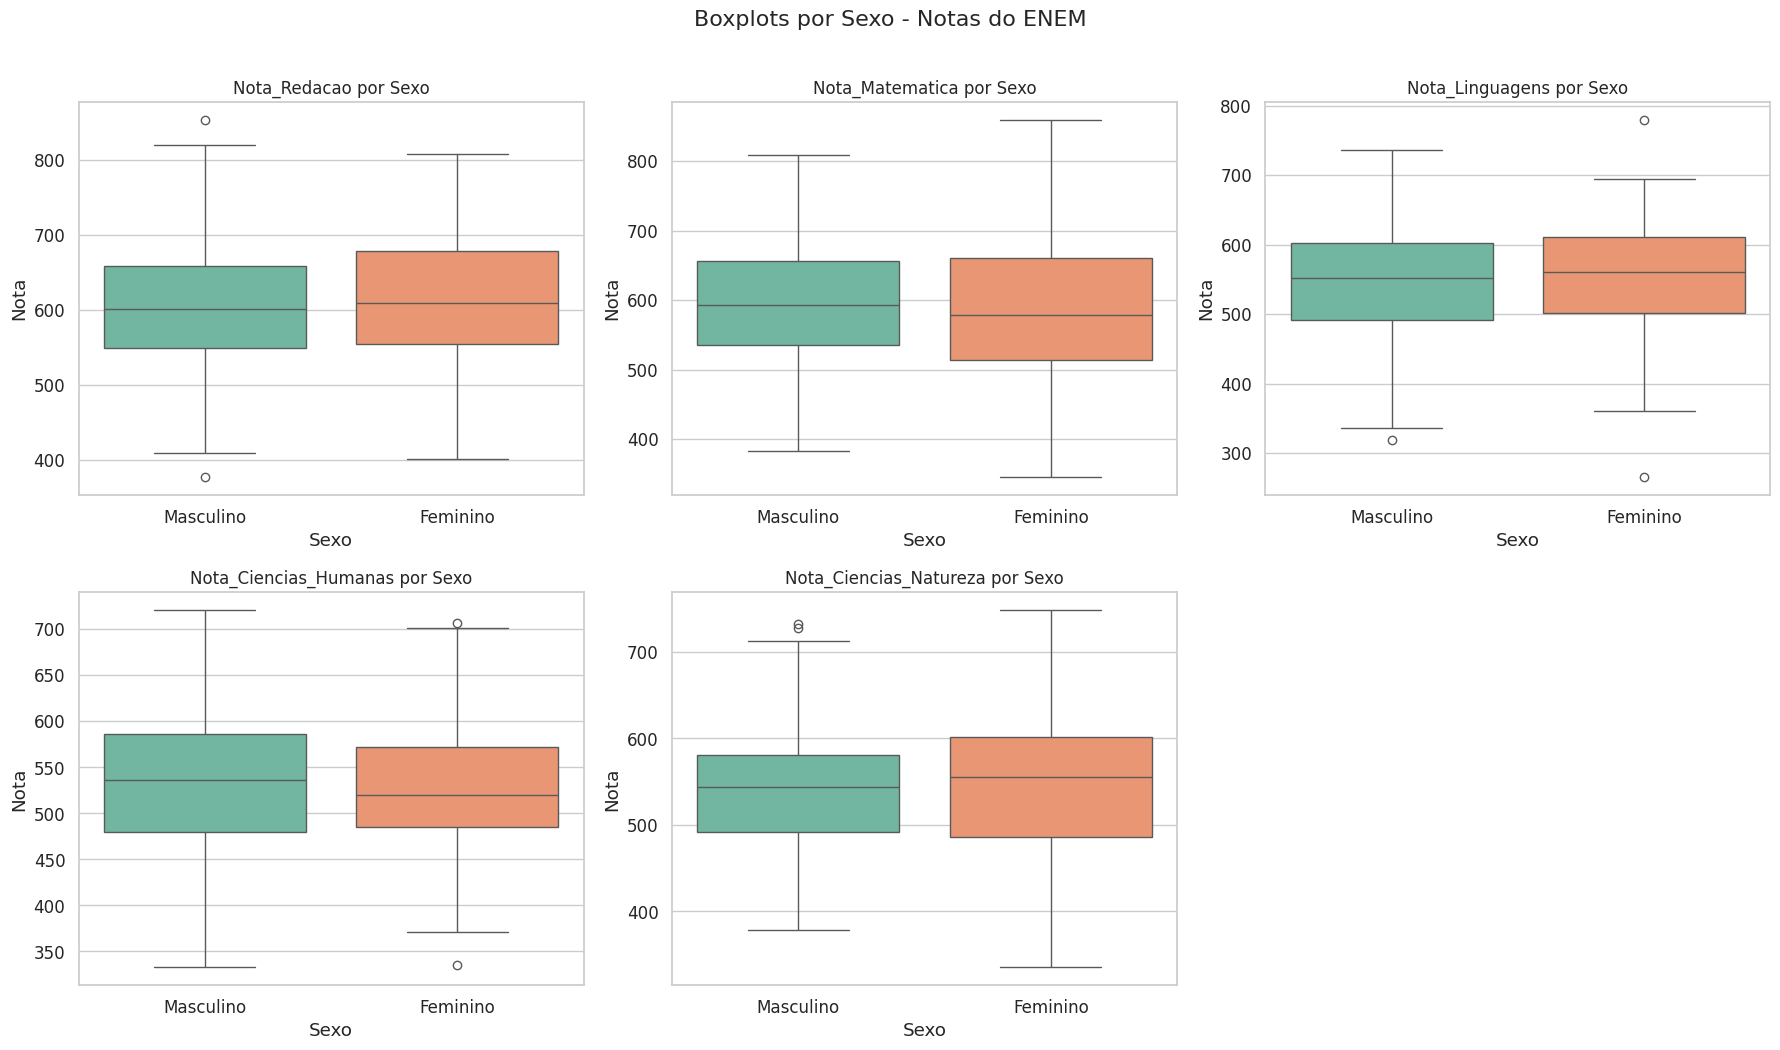

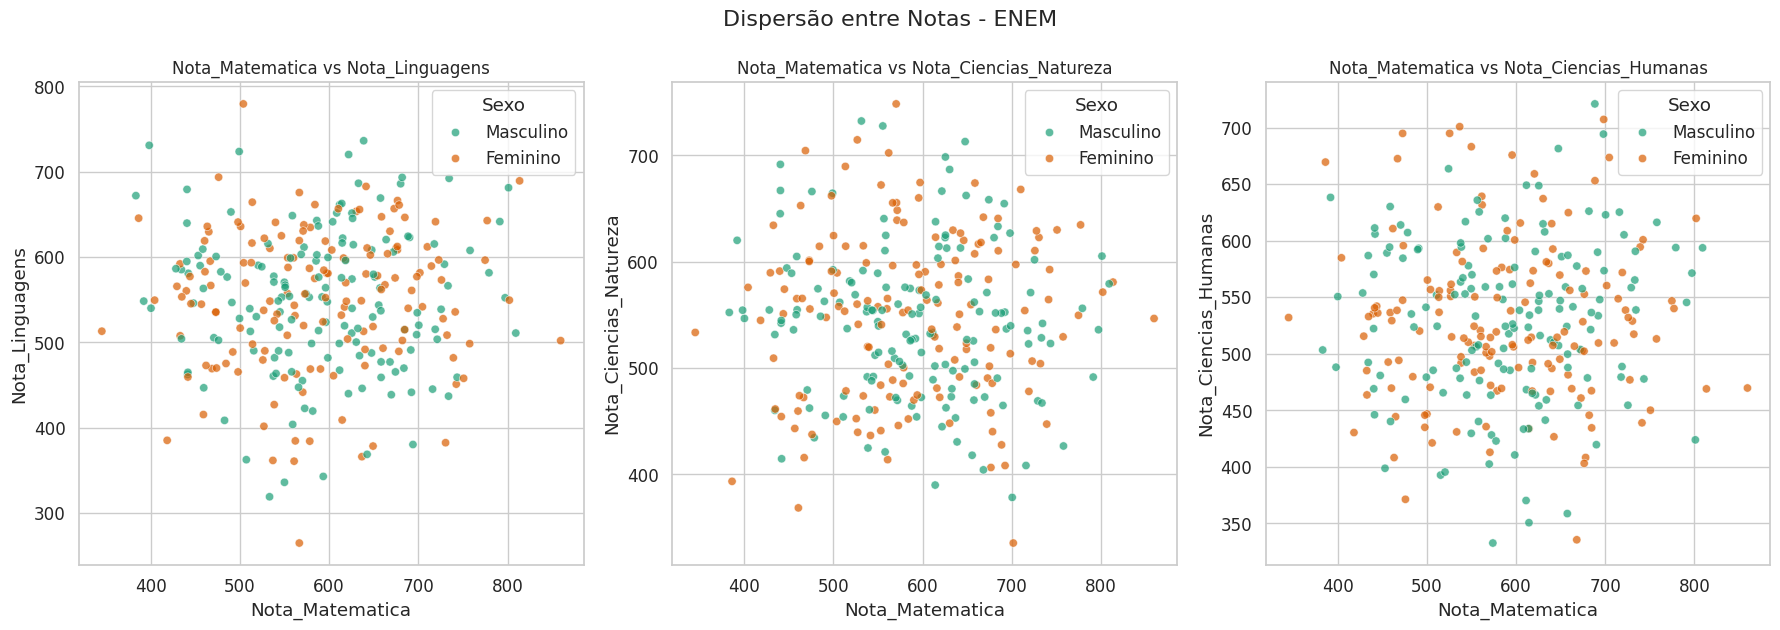

In [30]:


# visuais
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Boxplots por sexo para todas as disciplinas
plt.figure(figsize=(18, 10))
for i, coluna in enumerate(colunas_notas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Sexo', y=coluna, hue='Sexo', data=dados, palette='Set2', legend=False)
    plt.title(f'{coluna} por Sexo', fontsize=12)
    plt.xlabel('Sexo')
    plt.ylabel('Nota')

plt.tight_layout()
plt.suptitle('Boxplots por Sexo - Notas do ENEM', fontsize=16, y=1.05)
plt.show()

# Gráficos de dispersão entre pares de disciplinas e notas de matemática
pares = [
    ('Nota_Matematica', 'Nota_Linguagens'),
    ('Nota_Matematica', 'Nota_Ciencias_Natureza'),
    ('Nota_Matematica', 'Nota_Ciencias_Humanas')
]

plt.figure(figsize=(18, 6))
for i, (x, y) in enumerate(pares, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=x, y=y, hue='Sexo', data=dados, palette='Dark2', alpha=0.7)
    plt.title(f'{x} vs {y}', fontsize=12)
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.suptitle('Dispersão entre Notas - ENEM', fontsize=16, y=1.05)
plt.show()


In [31]:
colunas_notas = ['Nota_Redacao', 'Nota_Matematica', 'Nota_Linguagens',
                 'Nota_Ciencias_Humanas', 'Nota_Ciencias_Natureza']

# matriz de correlação de Pearson
corr_pearson = dados[colunas_notas].corr(method='pearson')

# Exibe a matriz
print(corr_pearson.round(3))

styled_corr = corr_pearson.style\
    .background_gradient(cmap='coolwarm')\
    .set_caption("📈 Matriz de Correlação de Pearson entre Notas do ENEM")\
    .format("{:.3f}")\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'center'), ('background-color', '#222222'), ('color', 'white')]
    }])

styled_corr


                        Nota_Redacao  Nota_Matematica  Nota_Linguagens  \
Nota_Redacao                   1.000           -0.053           -0.046   
Nota_Matematica               -0.053            1.000            0.025   
Nota_Linguagens               -0.046            0.025            1.000   
Nota_Ciencias_Humanas         -0.064            0.013           -0.079   
Nota_Ciencias_Natureza         0.016           -0.022           -0.067   

                        Nota_Ciencias_Humanas  Nota_Ciencias_Natureza  
Nota_Redacao                           -0.064                   0.016  
Nota_Matematica                         0.013                  -0.022  
Nota_Linguagens                        -0.079                  -0.067  
Nota_Ciencias_Humanas                   1.000                  -0.078  
Nota_Ciencias_Natureza                 -0.078                   1.000  


,Nota_Redacao,Nota_Matematica,Nota_Linguagens,Nota_Ciencias_Humanas,Nota_Ciencias_Natureza
Nota_Redacao,1.000,-0.053,-0.046,-0.064,0.016
Nota_Matematica,-0.053,1.000,0.025,0.013,-0.022
Nota_Linguagens,-0.046,0.025,1.000,-0.079,-0.067
Nota_Ciencias_Humanas,-0.064,0.013,-0.079,1.000,-0.078
Nota_Ciencias_Natureza,0.016,-0.022,-0.067,-0.078,1.000
